In [1]:
import pandas as pd


In [3]:
df_weekly = pd.read_csv("Project/Data/China/Weekly Market Information of Domestic Index165542650/IDX_Idxtrdweek.csv")
df_index = pd.read_csv("Project/Data/China/Index Profile170027150/IDX_Idxinfo.csv")

/var/folders/wp/k5t4pl853ng8y6kktqkmy3n80000gn/T/ipykernel_70216/3984912356.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_weekly = pd.read_csv("Project/Data/China/Weekly Market Information of Domestic Index165542650/IDX_Idxtrdweek.csv")


In [5]:
df_weekly.head()


,Indexcd,Week,Opnidx,Highidx,Lowidx,Clsidx,Vol,Value,Idxrtn
0,000001,1991-01,126.56,131.44,126.48,131.44,7.30,47.3,0.039462
1,000001,1991-02,131.99,134.61,131.45,134.60,320.63,1768.9,0.024041
2,000001,1991-03,134.11,135.19,133.65,134.24,181.47,1006.7,-0.002675
3,000001,1991-04,133.70,134.24,132.03,132.05,88.04,442.3,-0.016314
4,000001,1991-05,131.46,131.55,129.45,129.51,78.76,391.9,-0.019235


In [6]:
df_index.head() 

,Indexcd,Idxinfo01_en,Idxinfo11,Idxinfo07,Idxinfo08,Idxinfo09
0,000001,SSE Composite Index,1991-07-15,1.0,1.0,1.0
1,000001.ESCI,Yisheng Agricultural Products Futures Price Yi...,2009-06-01,4.0,5.0,7.0
2,000002,SSE A Share Index,1992-02-21,1.0,1.0,1.0
3,000002.ESCI,Yisheng Agricultural Products Futures Price Yi...,2009-06-01,4.0,5.0,7.0
4,000003,SSE B Share Index,1992-02-21,1.0,1.0,1.0


In [8]:

# Sicherstellen, dass Indexcd vom gleichen Typ ist (z. B. string)
df_weekly['Indexcd'] = df_weekly['Indexcd'].astype(str)
df_index['Indexcd'] = df_index['Indexcd'].astype(str)

# Merge anhand von Indexcd
merged_weekly = pd.merge(
    df_weekly,
    df_index[['Indexcd', 'Idxinfo01_en']],  # nur benötigte Spalten aus df_index
    on='Indexcd',
    how='left'  # falls es Codes gibt, die in df_index fehlen
)

# Nur gewünschte Spalten behalten
merged_weekly = merged_weekly[['Idxinfo01_en', 'Indexcd', 'Week', 'Clsidx']]

# Spalten umbenennen (optional, für Lesbarkeit)
merged_weekly.columns = ['EnglishName', 'IndexCode', 'Date', 'Closing']

# Ergebnis ansehen
display(merged_weekly.head(100))


,EnglishName,IndexCode,Date,Closing
0,SSE Composite Index,000001,1991-01,131.44
1,SSE Composite Index,000001,1991-02,134.60
2,SSE Composite Index,000001,1991-03,134.24
3,SSE Composite Index,000001,1991-04,132.05
4,SSE Composite Index,000001,1991-05,129.51
...,...,...,...,...
95,SSE Composite Index,000001,1992-44,507.25
96,SSE Composite Index,000001,1992-45,457.05
97,SSE Composite Index,000001,1992-46,414.09
98,SSE Composite Index,000001,1992-47,401.44


In [22]:
# DataFrames nach IndexCode filtern (und sprechende Namen vergeben)
df_sse_composite   = merged_weekly[merged_weekly['IndexCode'] == '000001']
df_sse_it_sector   = merged_weekly[merged_weekly['IndexCode'] == '000039']
df_csi_pharma_bio  = merged_weekly[merged_weekly['IndexCode'] == '000841']
df_automobile      = merged_weekly[merged_weekly['IndexCode'] == '801880']

# Übersichtliche Kontrolle
for name, df_temp in {
    "SSE Composite Index": df_sse_composite,
    "SSE Information Technology Sector Index": df_sse_it_sector,
    "CSI 800 Pharmaceuticals & Biotechnology Index": df_csi_pharma_bio,
    "Automobile": df_automobile
}.items():
    print(f"\n📊 {name}: {len(df_temp)} Zeilen, Zeitraum {df_temp['Date'].min()} → {df_temp['Date'].max()}")
    display(df_temp.head(3))



📊 SSE Composite Index: 1766 Zeilen, Zeitraum 1991-01 → 2025-42


,EnglishName,IndexCode,Date,Closing
0,SSE Composite Index,000001,1991-01,131.44
1,SSE Composite Index,000001,1991-02,134.60
2,SSE Composite Index,000001,1991-03,134.24



📊 SSE Information Technology Sector Index: 859 Zeilen, Zeitraum 2009-02 → 2025-42


,EnglishName,IndexCode,Date,Closing
53318,SSE Information Technology Sector index,000039,2009-02,1257.08
53319,SSE Information Technology Sector index,000039,2009-03,1343.77
53320,SSE Information Technology Sector index,000039,2009-04,1362.14



📊 CSI 800 Pharmaceuticals & Biotechnology Index: 658 Zeilen, Zeitraum 2012-51 → 2025-42


,EnglishName,IndexCode,Date,Closing
226730,CSI 800 Pharmaceuticals and Biotechnology Index,000841,2012-51,4815.273
226731,CSI 800 Pharmaceuticals and Biotechnology Index,000841,2012-52,5055.206
226732,CSI 800 Pharmaceuticals and Biotechnology Index,000841,2013-01,4984.736



📊 Automobile: 1306 Zeilen, Zeitraum 2000-01 → 2025-42


,EnglishName,IndexCode,Date,Closing
961693,Automobile,801880,2000-01,1051.07
961694,Automobile,801880,2000-02,1010.07
961695,Automobile,801880,2000-03,1033.10


In [19]:
# Sicherstellen, dass beide Spalten Strings sind
df_index["Indexcd"] = df_index["Indexcd"].astype(str)
df_weekly["Indexcd"] = df_weekly["Indexcd"].astype(str)

# 1️⃣ Schnittmenge aller Indexcodes
common_codes = set(df_index["Indexcd"]) & set(df_weekly["Indexcd"])

# 2️⃣ Indizes suchen, die "Automobile" oder "Automotive" enthalten
auto_df = df_index[
    df_index["Idxinfo01_en"].str.contains("Pharma|Health", case=False, na=False)
]

# 3️⃣ Nur behalten, die auch in df_weekly vorkommen
auto_common_df = auto_df[auto_df["Indexcd"].isin(common_codes)]

print(f"✅ Gefundene Auto-bezogene Indizes in beiden Tabellen: {len(auto_common_df)}")
display(auto_common_df)


✅ Gefundene Auto-bezogene Indizes in beiden Tabellen: 31


,Indexcd,Idxinfo01_en,Idxinfo11,Idxinfo07,Idxinfo08,Idxinfo09
45,000037,SSE Health Care Sector index,2009-01-09,1.0,3.0,1.0
83,000075,SSE Health Care Sector Equal Weight index,2010-08-18,1.0,3.0,1.0
115,000109,SSE 380 Health Care Index,2011-06-13,1.0,3.0,1.0
130,000121,SSE Health Care theme Index,2011-10-18,1.0,3.0,1.0
211,000808,CSI SWS Health Care Index (Health Care),2012-02-17,1.0,3.0,9.0
215,000814,CSI Health Care Sub-industry Index,2012-04-11,1.0,3.0,9.0
242,000841,CSI 800 Pharmaceuticals and Biotechnology Index,2012-12-21,1.0,3.0,9.0
257,000857,500 Health Care,2015-12-03,NaN,NaN,NaN
280,000913,CSI 300 Health Care index,2007-07-02,1.0,3.0,9.0
300,000933,CSI Health Care index,2009-07-03,1.0,3.0,9.0


In [23]:
import pandas as pd

# Hilfsfunktion zum Wochen-Check
def check_missing_weeks(df, name_col="EnglishName"):
    name = df[name_col].iloc[0] if not df.empty else "Unbekannt"
    df = df.copy()
    
    # Falls 'Date' kein Datum ist (z. B. '1991-01'), in Jahr + Woche splitten
    df[['Year', 'Week']] = df['Date'].astype(str).str.split('-', expand=True)
    df['Year'] = df['Year'].astype(int)
    df['Week'] = df['Week'].astype(int)
    
    # Liste aller erwarteten Wochen im Zeitraum
    min_year, max_year = df['Year'].min(), df['Year'].max()
    expected = []
    for y in range(min_year, max_year + 1):
        # 52 oder 53 Wochen je nach Jahr
        weeks_in_year = 53 if pd.Timestamp(f"{y}-12-31").isocalendar()[1] == 53 else 52
        expected += [f"{y}-{str(w).zfill(2)}" for w in range(1, weeks_in_year + 1)]

    # Tatsächlich vorhandene Wochen
    observed = df['Date'].astype(str).unique().tolist()
    
    # Fehlende Wochen
    missing = sorted(set(expected) - set(observed))
    
    print(f"\n📊 {name}:")
    print(f"   Zeitraum: {min_year}–{max_year}")
    print(f"   Erwartete Wochen: {len(expected)}")
    print(f"   Beobachtete Wochen: {len(observed)}")
    print(f"   Fehlende Wochen: {len(missing)}")
    
    if missing:
        print(f"   Beispiele fehlender Wochen: {missing[:10]}{' …' if len(missing) > 10 else ''}")
    else:
        print("   ✅ Keine fehlenden Wochen gefunden.")

# Auf deine vier DataFrames anwenden
for df_temp in [df_sse_composite, df_sse_it_sector, df_csi_pharma_bio, df_automobile]:
    check_missing_weeks(df_temp)



📊 SSE Composite Index:
   Zeitraum: 1991–2025
   Erwartete Wochen: 1826
   Beobachtete Wochen: 1766
   Fehlende Wochen: 60
   Beispiele fehlender Wochen: ['1994-06', '1995-05', '1996-08', '1996-09', '1997-06', '1997-07', '1998-05', '1998-06', '1999-07', '1999-08'] …

📊 SSE Information Technology Sector index:
   Zeitraum: 2009–2025
   Erwartete Wochen: 887
   Beobachtete Wochen: 859
   Fehlende Wochen: 28
   Beispiele fehlender Wochen: ['2009-01', '2009-05', '2010-07', '2011-40', '2012-04', '2012-40', '2013-07', '2016-06', '2016-40', '2017-40'] …

📊 CSI 800 Pharmaceuticals and Biotechnology Index:
   Zeitraum: 2012–2025
   Erwartete Wochen: 730
   Beobachtete Wochen: 658
   Fehlende Wochen: 72
   Beispiele fehlender Wochen: ['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10'] …

📊 Automobile:
   Zeitraum: 2000–2025
   Erwartete Wochen: 1356
   Beobachtete Wochen: 1306
   Fehlende Wochen: 50
   Beispiele fehlender Wochen: ['2000

In [24]:
import pandas as pd
from datetime import date

# Hilfsfunktion: erwartete Wochen (YYYY-WW) im Bereich [min_year, max_year]
def expected_weeks_between(min_year: int, max_year: int):
    exp = []
    for y in range(min_year, max_year + 1):
        weeks_in_year = 53 if pd.Timestamp(f"{y}-12-31").isocalendar()[1] == 53 else 52
        exp += [f"{y}-{str(w).zfill(2)}" for w in range(1, weeks_in_year + 1)]
    return exp

# Hilfsfunktion: fehlende Wochen als DataFrame
def missing_weeks_df(df, label=None):
    if df.empty:
        return pd.DataFrame(columns=["IndexName","IndexCode","Year","Week","YearWeek","WeekStart","Month"])
    tmp = df.copy()
    tmp["Year"] = tmp["Date"].astype(str).str.split("-", expand=True)[0].astype(int)
    tmp["Week"] = tmp["Date"].astype(str).str.split("-", expand=True)[1].astype(int)
    min_year, max_year = tmp["Year"].min(), tmp["Year"].max()
    expected = set(expected_weeks_between(min_year, max_year))
    observed = set(tmp["Date"].astype(str).unique())
    missing = sorted(expected - observed)

    rows = []
    for yw in missing:
        y, w = map(int, yw.split("-"))
        # ISO: Woche beginnt am Montag (=1)
        week_start = date.fromisocalendar(y, w, 1)
        rows.append({
            "IndexName": tmp["EnglishName"].iloc[0] if label is None else label,
            "IndexCode": tmp["IndexCode"].iloc[0],
            "Year": y,
            "Week": w,
            "YearWeek": yw,
            "WeekStart": pd.Timestamp(week_start),
            "Month": week_start.month
        })
    return pd.DataFrame(rows)

# Alle Indizes in ein Dict mit sprechenden Namen legen
dfs = {
    "SSE Composite Index": df_sse_composite,
    "SSE Information Technology Sector Index": df_sse_it_sector,
    "CSI 800 Pharmaceuticals & Biotechnology Index": df_csi_pharma_bio,
    "Automobile": df_automobile
}

# 1) Fehlende Wochen sammeln
miss_list = [missing_weeks_df(d, label=n) for n, d in dfs.items()]
missing_all = pd.concat(miss_list, ignore_index=True)
display(missing_all.head())

# 2) Häufigkeiten nach Kalenderwoche (gesamt)
freq_week_overall = (missing_all
                     .groupby("Week").size()
                     .reset_index(name="count")
                     .sort_values("count", ascending=False))
print("\nTop fehlende Kalenderwochen (gesamt):")
display(freq_week_overall.head(15))

# 3) Häufigkeiten nach Kalenderwoche je Index
freq_week_by_index = (missing_all
                      .groupby(["IndexName","Week"])
                      .size()
                      .reset_index(name="count")
                      .sort_values(["IndexName","count"], ascending=[True, False]))
print("\nTop 10 pro Index:")
display(freq_week_by_index.groupby("IndexName").head(10))

# 4) Häufigkeiten nach Monat (gesamt + je Index)
freq_month_overall = (missing_all
                      .groupby("Month").size()
                      .reset_index(name="count")
                      .sort_values("count", ascending=False))
print("\nFehlende Wochen nach Monat (gesamt):")
display(freq_month_overall)

freq_month_by_index = (missing_all
                       .groupby(["IndexName","Month"])
                       .size()
                       .reset_index(name="count")
                       .sort_values(["IndexName","count"], ascending=[True, False]))
print("\nFehlende Wochen nach Monat (pro Index):")
display(freq_month_by_index)

# 5) Wiederkehrende Lücken: gleiche Kalenderwoche fehlt in >= N Jahren
N = 5  # Schwelle anpassen
recurrent = (missing_all
             .groupby(["IndexName","Week"])["Year"]
             .nunique()
             .reset_index(name="num_years_missing")
             .query("num_years_missing >= @N")
             .sort_values(["IndexName","num_years_missing"], ascending=[True, False]))
print(f"\nWiederkehrende Lücken (gleiche KW fehlt in ≥ {N} Jahren):")
display(recurrent)

# 6) Mehrwöchige Streaks (≥2 zusammenhängende Wochen) je Index & Jahr
streak_rows = []
for idx_name, g in missing_all.groupby(["IndexName","Year"], as_index=False):
    g = g.sort_values("Week")
    if g.empty: 
        continue
    start = prev = None
    length = 0
    for w in g["Week"]:
        if start is None:
            start = prev = w
            length = 1
            continue
        if w == prev + 1:
            prev = w
            length += 1
        else:
            if length >= 2:
                streak_rows.append({"IndexName": idx_name[0], "Year": idx_name[1],
                                    "from_week": start, "to_week": prev, "length_weeks": length})
            start = prev = w
            length = 1
    if length >= 2:
        streak_rows.append({"IndexName": idx_name[0], "Year": idx_name[1],
                            "from_week": start, "to_week": prev, "length_weeks": length})

streaks = pd.DataFrame(streak_rows).sort_values(["IndexName","Year","from_week"])
print("\nMehrwöchige Lücken (Streaks ≥ 2 Wochen):")
display(streaks)


,IndexName,IndexCode,Year,Week,YearWeek,WeekStart,Month
0,SSE Composite Index,000001,1994,6,1994-06,1994-02-07,2
1,SSE Composite Index,000001,1995,5,1995-05,1995-01-30,1
2,SSE Composite Index,000001,1996,8,1996-08,1996-02-19,2
3,SSE Composite Index,000001,1996,9,1996-09,1996-02-26,2
4,SSE Composite Index,000001,1997,6,1997-06,1997-02-03,2



Top fehlende Kalenderwochen (gesamt):


,Week,count
39,40,41
4,5,20
5,6,18
6,7,16
3,4,12
17,18,7
7,8,7
45,46,5
42,43,5
43,44,5



Top 10 pro Index:


,IndexName,Week,count
7,Automobile,40,14
1,Automobile,5,6
2,Automobile,6,5
0,Automobile,4,4
3,Automobile,7,4
5,Automobile,18,3
4,Automobile,8,2
6,Automobile,19,2
8,Automobile,43,1
9,Automobile,44,1



Fehlende Wochen nach Monat (gesamt):


,Month,count
9,10,49
1,2,43
0,1,35
10,11,20
11,12,19
4,5,14
8,9,8
3,4,5
6,7,5
2,3,4



Fehlende Wochen nach Monat (pro Index):


,IndexName,Month,count
4,Automobile,10,14
1,Automobile,2,11
0,Automobile,1,10
2,Automobile,5,5
5,Automobile,11,4
6,Automobile,12,4
3,Automobile,9,2
16,CSI 800 Pharmaceuticals & Biotechnology Index,10,12
7,CSI 800 Pharmaceuticals & Biotechnology Index,1,8
8,CSI 800 Pharmaceuticals & Biotechnology Index,2,8



Wiederkehrende Lücken (gleiche KW fehlt in ≥ 5 Jahren):


,IndexName,Week,num_years_missing
7,Automobile,40,14
1,Automobile,5,6
2,Automobile,6,5
57,CSI 800 Pharmaceuticals & Biotechnology Index,40,6
78,SSE Composite Index,40,14
71,SSE Composite Index,5,8
72,SSE Composite Index,6,8
73,SSE Composite Index,7,6
94,SSE Information Technology Sector Index,40,7



Mehrwöchige Lücken (Streaks ≥ 2 Wochen):


,IndexName,Year,from_week,to_week,length_weeks
0,Automobile,2000,5,6,2
1,Automobile,2001,4,5,2
2,Automobile,2002,7,8,2
3,Automobile,2025,43,52,10
4,CSI 800 Pharmaceuticals & Biotechnology Index,2012,1,50,50
5,CSI 800 Pharmaceuticals & Biotechnology Index,2025,43,52,10
6,SSE Composite Index,1996,8,9,2
7,SSE Composite Index,1997,6,7,2
8,SSE Composite Index,1998,5,6,2
9,SSE Composite Index,1999,7,8,2


In [25]:
import numpy as np
import pandas as pd

# Kopie (optional)
wk = merged_weekly.copy()

# Sicherstellen: Closing ist numerisch und > 0 (sonst log nicht definiert)
wk['Closing'] = pd.to_numeric(wk['Closing'], errors='coerce')
wk.loc[wk['Closing'] <= 0, 'Closing'] = np.nan

# Date "YYYY-WW" in Jahr/Woche aufsplitten, um sauber zu sortieren
wk[['Year', 'Week']] = wk['Date'].astype(str).str.split('-', expand=True).astype(int)

# Sortierung pro Index
wk = wk.sort_values(['IndexCode', 'Year', 'Week'])

# Log-Return: ln(P_t / P_{t-1}) = ln(P_t) - ln(P_{t-1})
wk['LogReturn'] = (
    np.log(wk['Closing'])
    .groupby(wk['IndexCode'])
    .diff()
)

# Optional: in Prozentpunkten
wk['LogReturn_pct'] = wk['LogReturn'] * 100

# Auf die gewünschten Spalten reduzieren
logret_weekly = wk[['EnglishName', 'IndexCode', 'Date', 'Closing', 'LogReturn', 'LogReturn_pct']]

display(logret_weekly.head(10))


,EnglishName,IndexCode,Date,Closing,LogReturn,LogReturn_pct
0,SSE Composite Index,000001,1991-01,131.44,NaN,NaN
1,SSE Composite Index,000001,1991-02,134.60,0.023757,2.375694
2,SSE Composite Index,000001,1991-03,134.24,-0.002678,-0.267817
3,SSE Composite Index,000001,1991-04,132.05,-0.016449,-1.644860
4,SSE Composite Index,000001,1991-05,129.51,-0.019423,-1.942254
5,SSE Composite Index,000001,1991-06,130.38,0.006695,0.669517
6,SSE Composite Index,000001,1991-07,132.53,0.016356,1.635577
7,SSE Composite Index,000001,1991-08,134.87,0.017502,1.750232
8,SSE Composite Index,000001,1991-09,132.53,-0.017502,-1.750232
9,SSE Composite Index,000001,1991-10,129.89,-0.020121,-2.012110


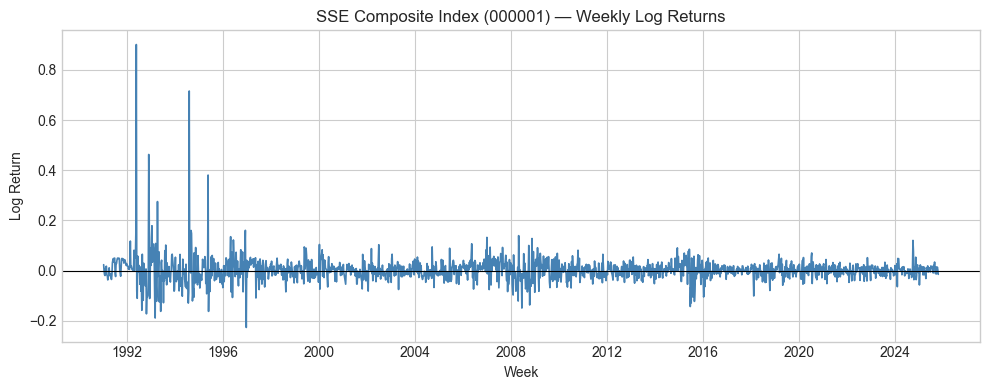

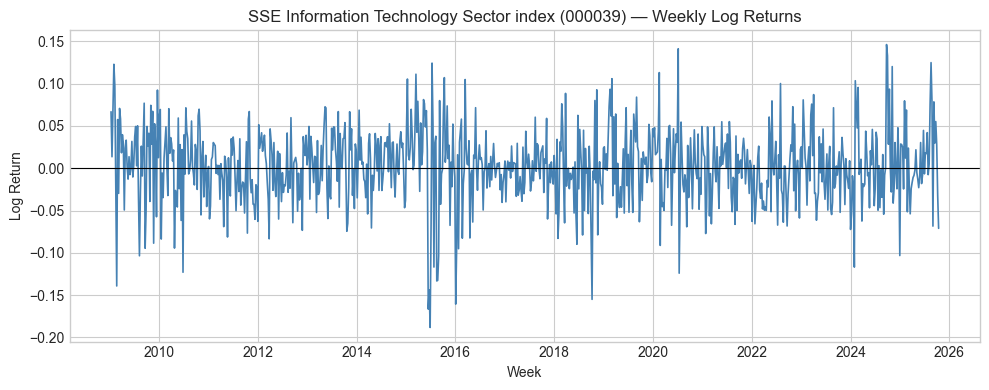

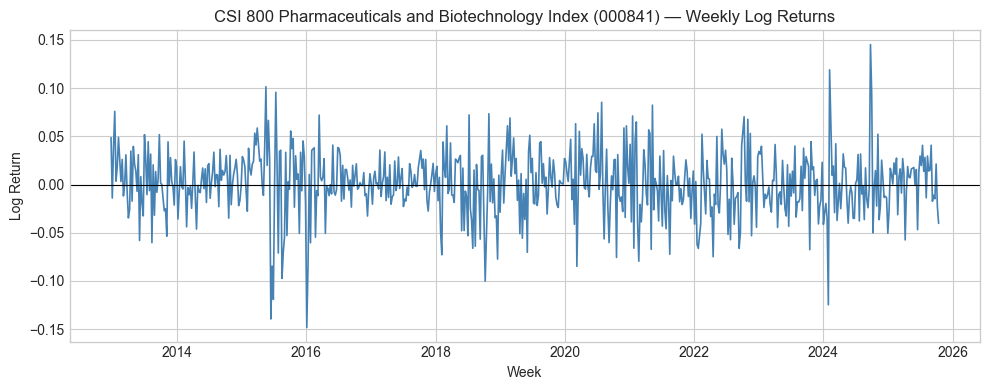

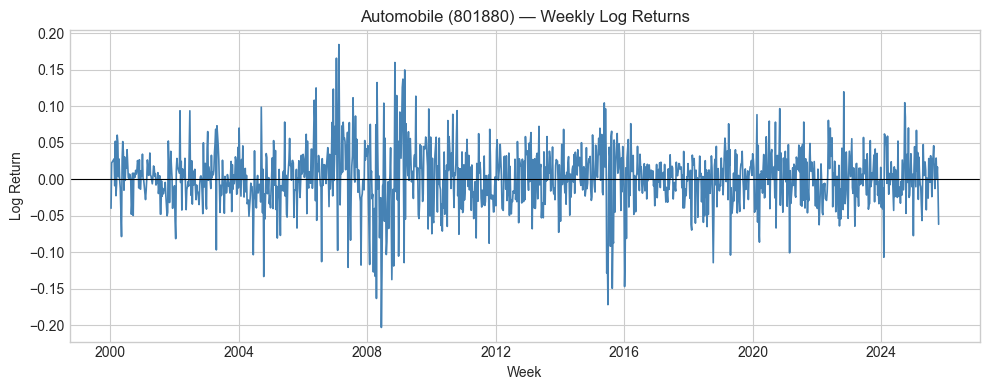

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nur die vier gewünschten Indizes
target_codes = ['000001', '000039', '000841', '801880']

# Daten vorbereiten
wk = merged_weekly[merged_weekly['IndexCode'].isin(target_codes)].copy()
wk['Closing'] = pd.to_numeric(wk['Closing'], errors='coerce')
wk.loc[wk['Closing'] <= 0, 'Closing'] = np.nan

# Jahr/Woche aufsplitten
wk[['Year', 'Week']] = wk['Date'].astype(str).str.split('-', expand=True).astype(int)
wk = wk.sort_values(['IndexCode', 'Year', 'Week'])

# Logarithmierte Returns berechnen
wk['LogReturn'] = np.log(wk['Closing']).groupby(wk['IndexCode']).diff()

# Wochenbeginn (Montag) für X-Achse berechnen
wk['WeekStart'] = wk.apply(lambda r: pd.Timestamp.fromisocalendar(r['Year'], r['Week'], 1), axis=1)

# Nur relevante Spalten behalten
wk = wk[['EnglishName', 'IndexCode', 'WeekStart', 'Closing', 'LogReturn']].dropna()

# Matplotlib-Style
plt.style.use('seaborn-v0_8-whitegrid')

# Plot pro Index
for code in target_codes:
    sub = wk[wk['IndexCode'] == code]
    name = sub['EnglishName'].iloc[0]
    
    plt.figure(figsize=(10, 4))
    plt.plot(sub['WeekStart'], sub['LogReturn'], linewidth=1.2, color='steelblue')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.title(f"{name} ({code}) — Weekly Log Returns", fontsize=12)
    plt.xlabel("Week")
    plt.ylabel("Log Return")
    plt.tight_layout()
    plt.show()


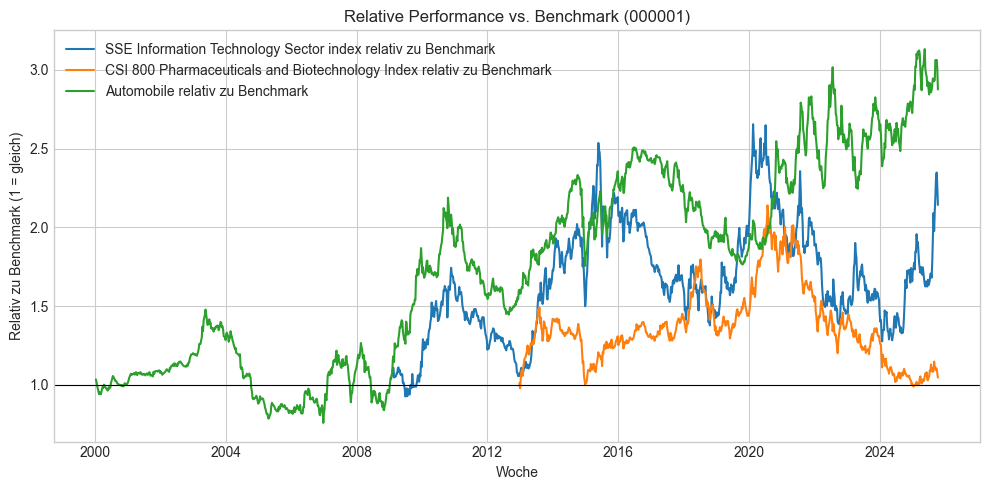

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

codes = ['000001', '000039', '000841', '801880']  # Benchmark + Subindizes
bench = '000001'  # SSE Composite Index

# Daten vorbereiten
df = merged_weekly[merged_weekly['IndexCode'].isin(codes)].copy()
df['Closing'] = pd.to_numeric(df['Closing'], errors='coerce')
df.loc[df['Closing'] <= 0, 'Closing'] = np.nan
df[['Year','Week']] = df['Date'].astype(str).str.split('-', expand=True).astype(int)
df['WeekStart'] = df.apply(lambda r: pd.Timestamp.fromisocalendar(r['Year'], r['Week'], 1), axis=1)
df = df.sort_values(['IndexCode','WeekStart'])

# Log-Returns je Index
df['LogReturn'] = np.log(df['Closing']).groupby(df['IndexCode']).diff()

# Pivot: Zeilen = Woche, Spalten = Index, Werte = LogReturn
pivot = df.pivot(index='WeekStart', columns='IndexCode', values='LogReturn').sort_index()

# Nur Wochen behalten, in denen Benchmark vorhanden ist
pivot = pivot.dropna(subset=[bench])

# Relative Performance aus Exzess-Returns: exp(cumsum(sub - bench))
rel = {}
names = {}
for code in codes:
    if code == bench or code not in pivot:
        continue
    pair = pivot[[bench, code]].dropna()               # nur gemeinsame Wochen
    ex_ret = (pair[code] - pair[bench]).cumsum()       # kum. Exzess-Logreturn
    rel_series = np.exp(ex_ret)                        # Start = 1.0
    rel[code] = rel_series
    # Label/Name
    names[code] = df.loc[df['IndexCode']==code, 'EnglishName'].dropna().iloc[0]

# Plot
plt.figure(figsize=(10,5))
for code, series in rel.items():
    plt.plot(series.index, series.values, label=f"{names[code]} relativ zu Benchmark")
plt.axhline(1.0, color='black', linewidth=0.8)
plt.title("Relative Performance vs. Benchmark (000001)")
plt.ylabel("Relativ zu Benchmark (1 = gleich)")
plt.xlabel("Woche")
plt.legend()
plt.tight_layout()
plt.show()
